# Avocado Project (Group E4)

### 1. Introduction and Motivation

**Dataset**: Avocado Prices  

The source we are using is the clean and dense dataset provided by **Kaggle**  
- Link: https://www.kaggle.com/datasets/neuromusic/avocado-prices  

Raw Avocado dataset was provided to Kaggle by **Hass Avocado Board**  
- Link: ​​https://hassavocadoboard.com/  
 

As we delve into the intricacies of the avocado market, our project, equipped with a rich dataset from Kaggle (originally provided by Hass Avocado Board) , stands at the intersection of statistical inquiry and real-world application. Our team members: Tim Zhou, Zivai Sinemani, Hazel Zhou, and Roy Tao, are on a quest to decipher the patterns that govern avocado sales and pricing across the United States. By examining the volume of avocados sold in relation to type, region, month, and average price, we aim to construct a predictive linear model that can predict the total volume of Avocados sold and ultimately inform us on both economic strategies and consumer choices. This endeavor will not only allow us to test the theoretical underpinnings of market dynamics but also provide actionable insights into the factors that sway the cost of avocados, a staple in contemporary diets. Our analysis is motivated by the potential to facilitate better financial planning for avocado enthusiasts everywhere, ensuring that the enjoyment of this beloved fruit continues unabated.


### 2. Data Preparation:

In [60]:
# Importing libraries
library(lubridate)
library(ggplot2)

#### A. Data Cleaning

After loading data and dropping unrelated columns from the dataframe, this is the dataframe we're left with:

In [61]:
# Import Data:
df = read.csv("avocado.csv", header = TRUE)
# Removing unused columns:
drops <- c("X","X4046","X4225","X4770","Total.Bags","Small.Bags","Large.Bags", "XLarge.Bags")
df = df[ , !(names(df) %in% drops)]
# Preview first 2 rows of data
head(df,2)
cat("Row number = ", nrow(df))
cat("\n Col number = ", ncol(df))

,Date,AveragePrice,Total.Volume,type,year,region
,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,2015-12-27,1.33,64236.62,conventional,2015,Albany
2,2015-12-20,1.35,54876.98,conventional,2015,Albany


Row number =  18249
 Col number =  6

We verify that the data does not contain empty value:

In [62]:
# Check for null values in dataframe
na_count = sum(is.na(df))
sprintf("The dataset contains %d na values", na_count)

[1] "The dataset contains 0 na values"

We then factorize all categorical variables in our dataset: since factors work more consistently for variables in the format of strings in R.

In [63]:
df$type = factor(df$type)
df$region = factor(df$region)
df$year = factor(df$year)
head(df,2)

,Date,AveragePrice,Total.Volume,type,year,region
,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,2015-12-27,1.33,64236.62,conventional,2015,Albany
2,2015-12-20,1.35,54876.98,conventional,2015,Albany


#### B. Feature Transformation
As discussed in the proposal and proposal feedbacks, we will extract month information from the Data Column, as a categorical explanatory variable in our model. The benefit of doing this is without losing too much value, we are able to have a feature that has significantly fewer levels, which would make the model we fit smaller, and more explainable.

In [64]:
df$Date <- ymd(df$Date)
# Extract the month number
df$Month <- factor(month(df$Date))
df = df[ , !(names(df) %in% c("Date"))]
head(df,2)

,AveragePrice,Total.Volume,type,year,region,Month
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,1.33,64236.62,conventional,2015,Albany,12
2,1.35,54876.98,conventional,2015,Albany,12


Now that we have a cleaned data with all the desired features, we can delve into Explanatory Data Analysis phase and make some nice visualizations of the data.

### 3. EDA

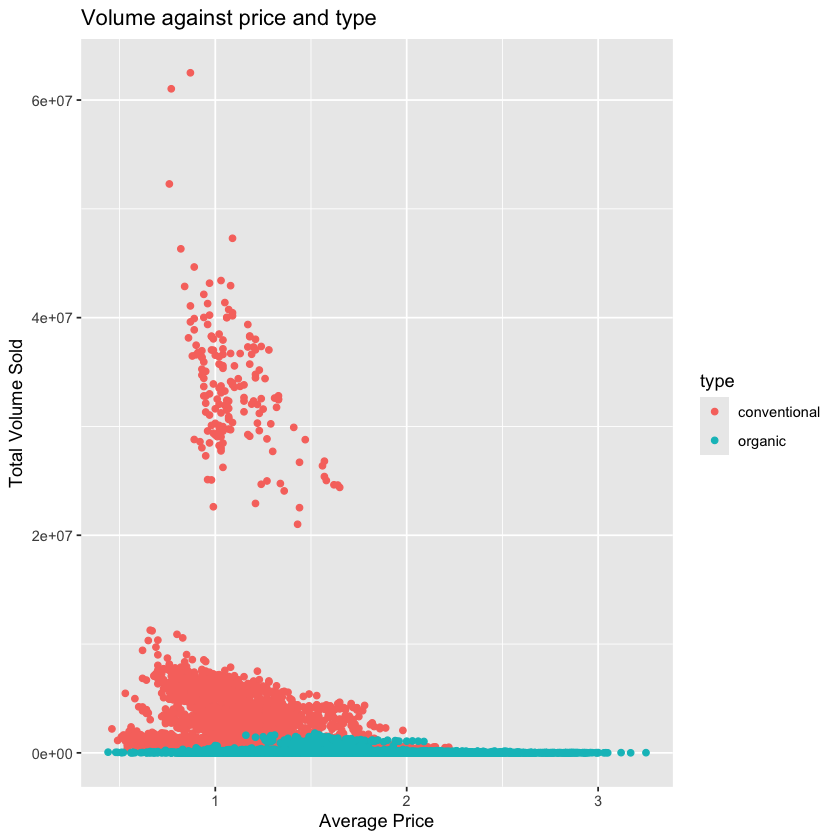

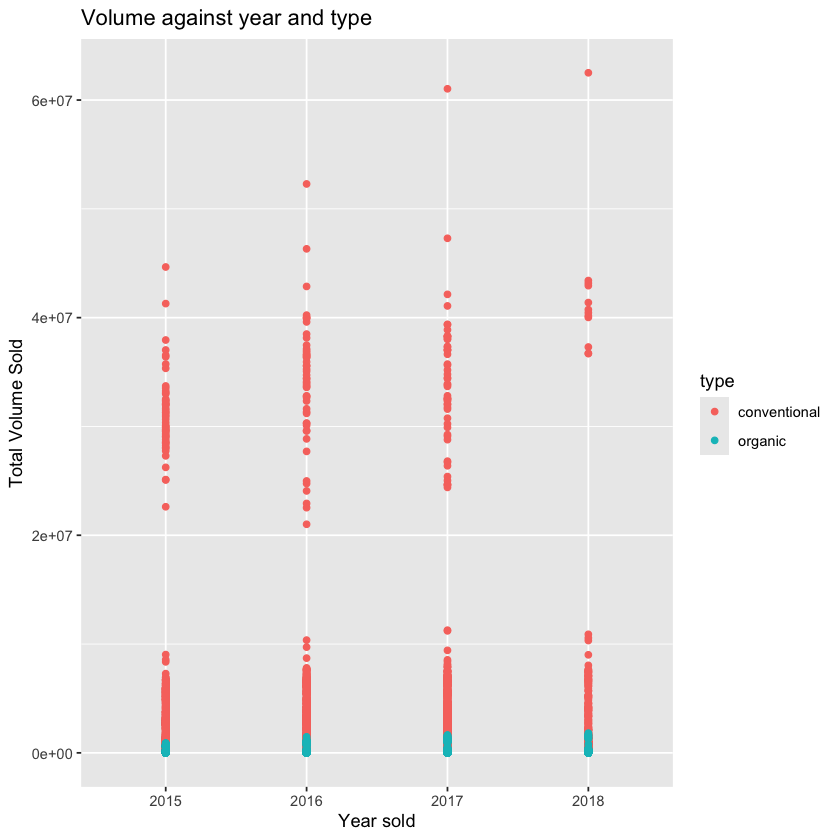

In [65]:
ggplot(df, aes(AveragePrice, Total.Volume, colour = type))+ 
  geom_point()+
  ggtitle("Volume against price and type")+
  xlab("Average Price")+
  ylab("Total Volume Sold")

ggplot(df, aes(year, Total.Volume, colour = type)) +
  geom_point()+
  ggtitle("Volume against year and type")+
  xlab("Year sold")+
  ylab("Total Volume Sold")

From these two plots, we see that there is a great difference between the
Volume of conventional and organic avocados sold.   
As such, we believe that it would make sense to analyze both individually

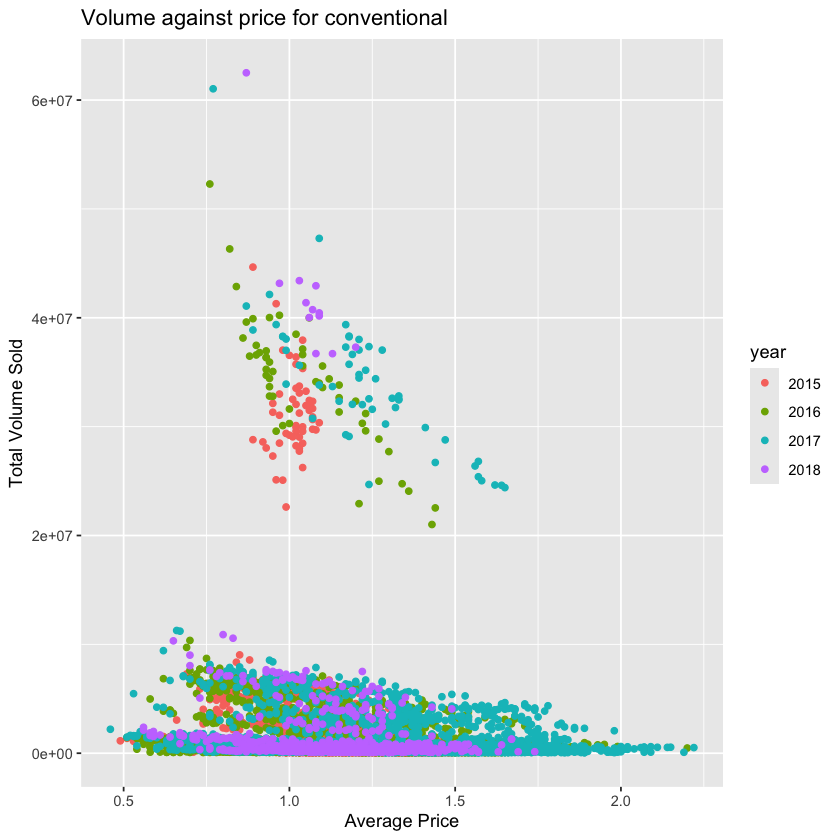

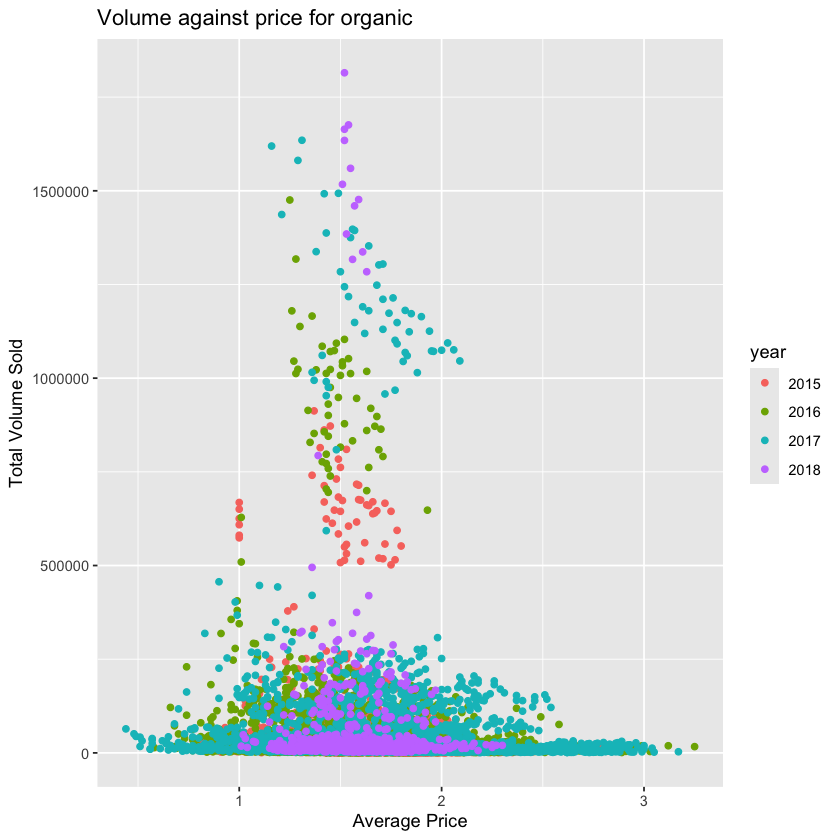

In [66]:
ggplot(subset(df, type == "conventional"), aes(AveragePrice, Total.Volume, colour = year)) +
  geom_point() +
  ggtitle("Volume against price for conventional") +
  xlab("Average Price") +
  ylab("Total Volume Sold")

ggplot(subset(df, type == "organic"), aes(AveragePrice, Total.Volume, colour = year)) +
  geom_point() +
  ggtitle("Volume against price for organic") +
  xlab("Average Price") +
  ylab("Total Volume Sold")

In both the conventional and the organic avocado plots, it can be seen that
there are two distinct groups, to see why there's this difference, we will
group by the other variables to see if we can identify the reason

Inspecting the data more closely, it can be seen that many of the top results 
are for total US/ regions of the US, aka west, east, and central. In order to
account for this, we can remove these points and analyze them separately
while doing this, we will also make two dataframes, one for conventional, and
one for organic

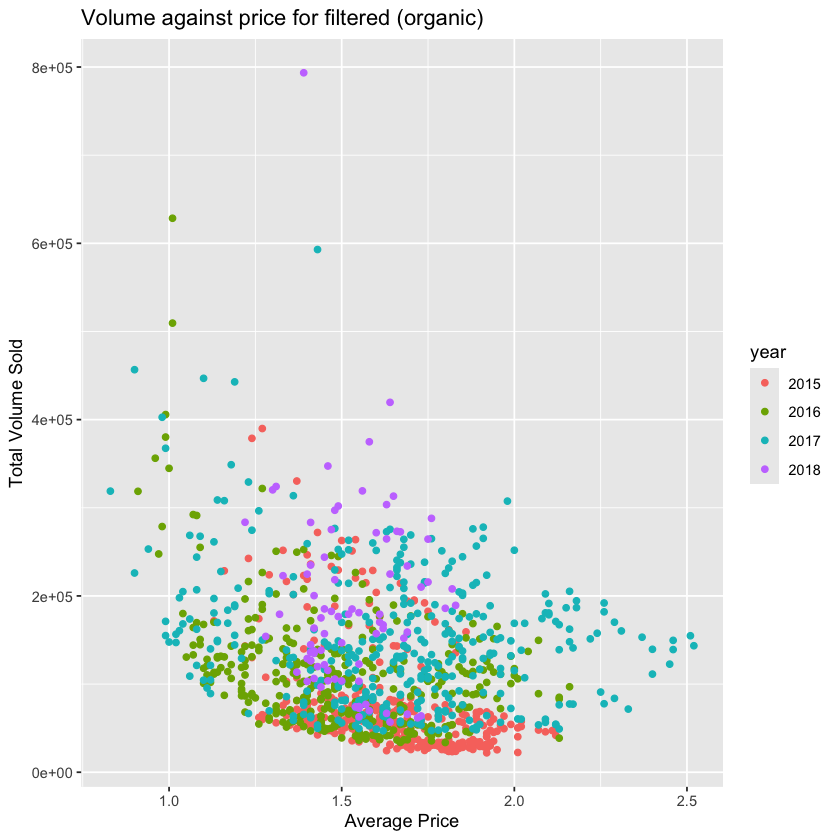

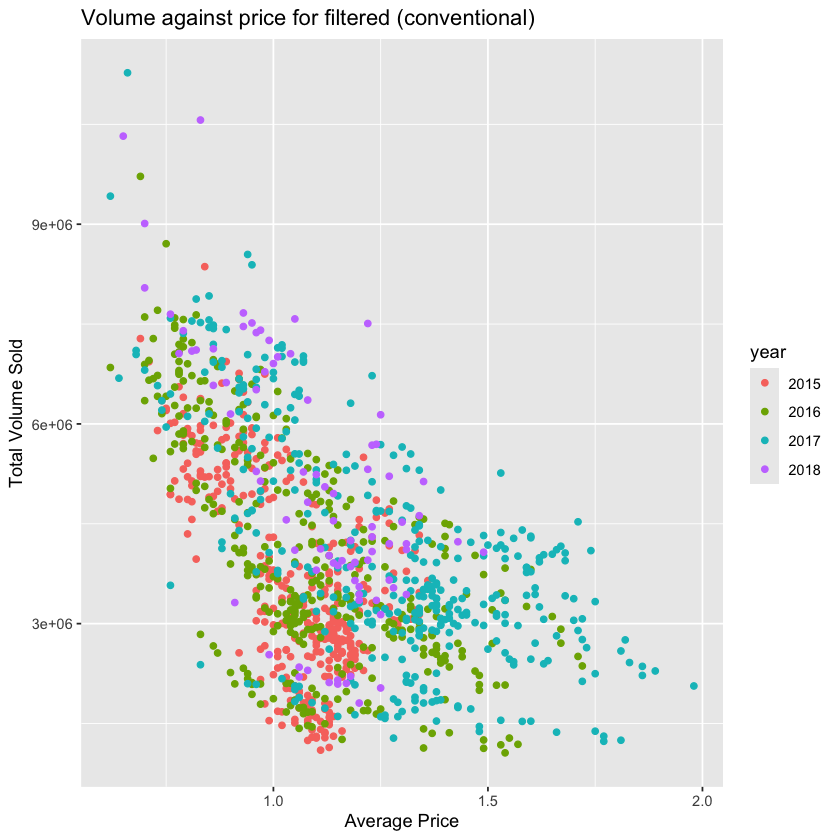

In [67]:
regions_to_include <- c("West", "SouthCentral", "SouthEast", 
                        "Midsouth", "GreatLakes", "Southeast", "Northeast",
                        "Plains")


# # Filter the dataframe to include the specified regions
df_filtered <- subset(df, (region %in% regions_to_include))

# Filter the dataframe to make one for organic and one for conventional

df_filtered_c <- subset(df_filtered, (type %in% "conventional"))
df_filtered_o <- subset(df_filtered, type %in% "organic")

# Once removing these results, the results become more consistent

ggplot(subset(df_filtered, type == "organic"), aes(AveragePrice, Total.Volume, colour = year)) +
  geom_point() +
  ggtitle("Volume against price for filtered (organic)") +
  xlab("Average Price") +
  ylab("Total Volume Sold")

ggplot(subset(df_filtered, type == "conventional"), aes(AveragePrice, Total.Volume, colour = year)) +
  geom_point() +
  ggtitle("Volume against price for filtered (conventional)") +
  xlab("Average Price") +
  ylab("Total Volume Sold")

### 4. Model Fitting

In [68]:
full_model_wo_int <- lm(Total.Volume ~ type + AveragePrice + year + Month + region , data = df_filtered)
summary(full_model_wo_int)


Call:
lm(formula = Total.Volume ~ type + AveragePrice + year + Month + 
    region, data = df_filtered)

Residuals:
     Min       1Q   Median       3Q      Max 
-1768804  -623581   -37369   549505  5397761 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4698643     129800  36.199  < 2e-16 ***
typeorganic        -3304003      60329 -54.766  < 2e-16 ***
AveragePrice       -1176507     104355 -11.274  < 2e-16 ***
year2016             129408      45582   2.839  0.00456 ** 
year2017             360618      46664   7.728 1.61e-14 ***
year2018             719284      80908   8.890  < 2e-16 ***
Month2               201444      79460   2.535  0.01130 *  
Month3                -8339      78040  -0.107  0.91491    
Month4               140051      85770   1.633  0.10263    
Month5               361277      84077   4.297 1.80e-05 ***
Month6               286029      88048   3.249  0.00118 ** 
Month7               184951      85259   2.169  0.03016 

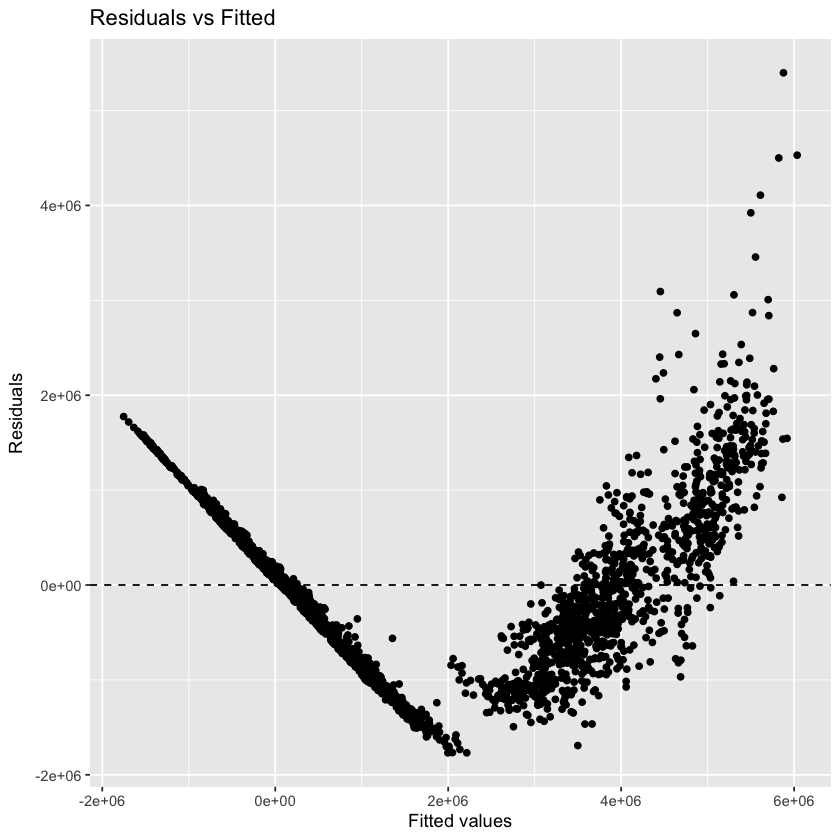

In [69]:
ggplot(full_model_wo_int, aes(.fitted, .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(x = "Fitted values", y = "Residuals") +
  ggtitle("Residuals vs Fitted")

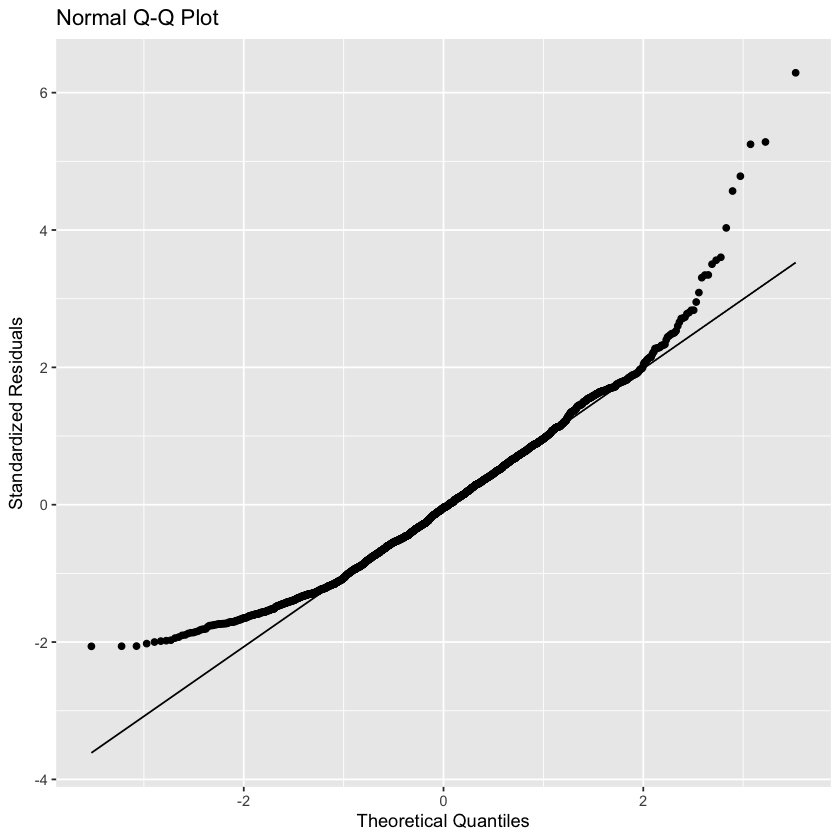

In [70]:
ggplot(full_model_wo_int, aes(sample = .stdresid)) +
  stat_qq() +
  stat_qq_line() +
  labs(x = "Theoretical Quantiles", y = "Standardized Residuals") +
  ggtitle("Normal Q-Q Plot")

As we can see, when we use a model with all features but no interaction, there is a clear pattern on the residual plot, suggesting that a more complicated model might be needed. Combined with the findings we discovered in the EDA phase, we decide to try a model with interactions.

In [71]:
full_model_w_int <- lm(Total.Volume ~ type * AveragePrice * year * Month * region , data = df_filtered)
summary(full_model_w_int)


Call:
lm(formula = Total.Volume ~ type * AveragePrice * year * Month * 
    region, data = df_filtered)

Residuals:
     Min       1Q   Median       3Q      Max 
-1148240   -12315      119    14509  1087229 

Coefficients: (252 not defined because of singularities)
                                                              Estimate
(Intercept)                                                    7467122
typeorganic                                                   -7371726
AveragePrice                                                  -4037679
year2016                                                       1911129
year2017                                                       -206776
year2018                                                       2621152
Month2                                                         5381931
Month3                                                         4584865
Month4                                                         3328332
Month5                 

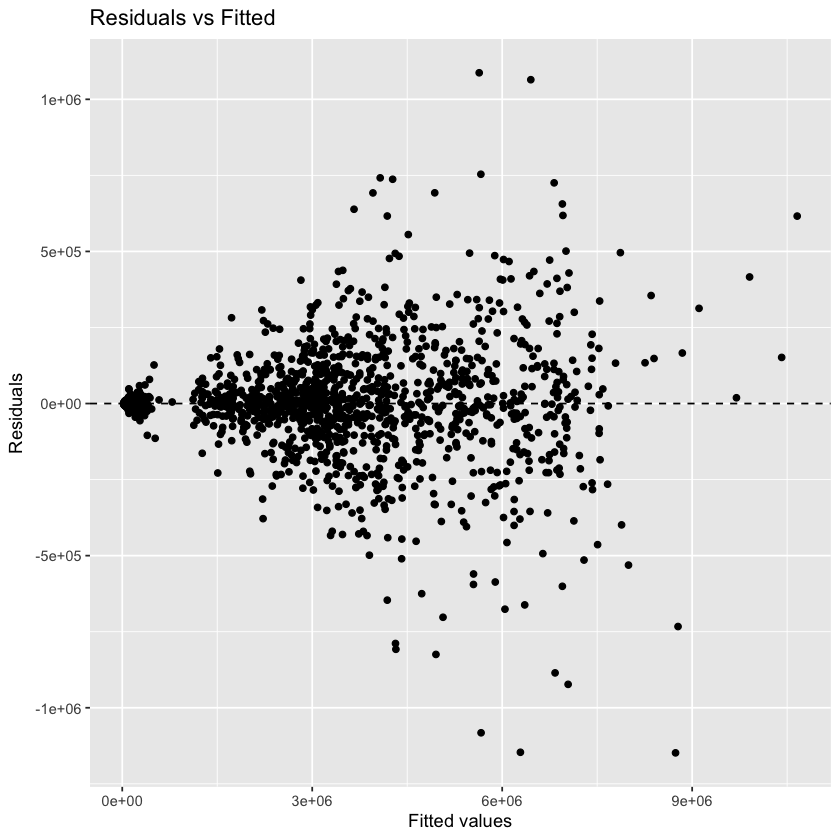

In [72]:
ggplot(full_model_w_int, aes(.fitted, .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(x = "Fitted values", y = "Residuals") +
  ggtitle("Residuals vs Fitted")

Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_qq()`)."
Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_qq_line()`)."


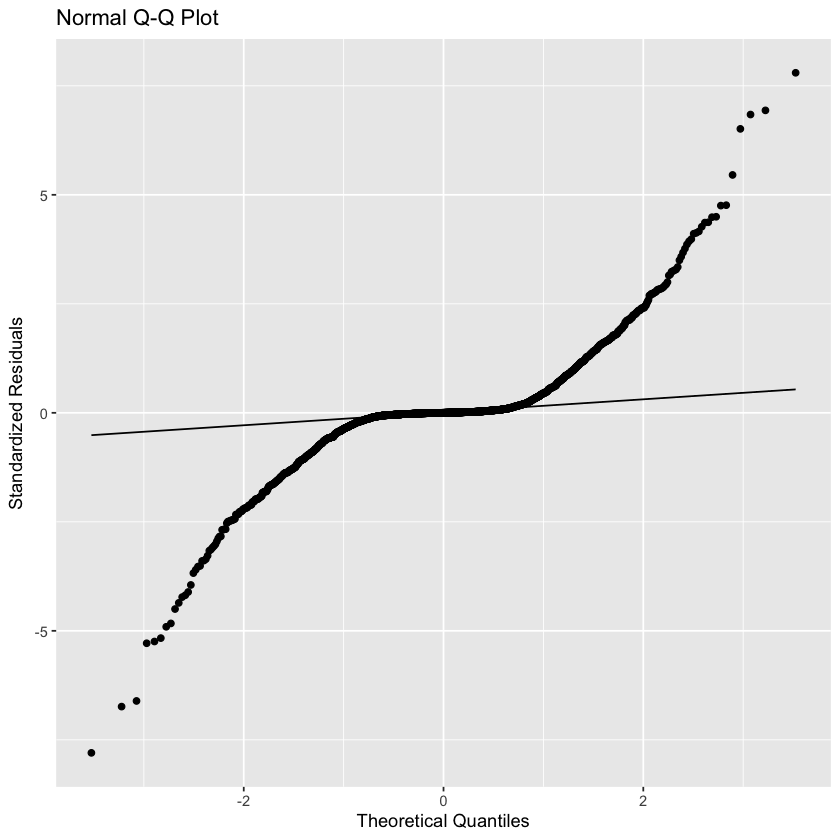

In [73]:
ggplot(full_model_w_int, aes(sample = .stdresid)) +
  stat_qq() +
  stat_qq_line() +
  labs(x = "Theoretical Quantiles", y = "Standardized Residuals") +
  ggtitle("Normal Q-Q Plot")

Incorporating interactions into the fitted model effectively eradicates the previously discerned patterns, signaling a marked improvement in fit. Nevertheless, a closer examination of the residual plot reveals a conspicuous cone shape, indicative of growing variance. Furthermore, it's worth noting that the QQ plot exhibits heavy tails, suggesting potential deviations from normality in the data distribution. To mitigate these issue, we propose applying a logarithmic transformation to the response variable, total volume.

In [74]:
full_model_w_int_log <- lm(log(Total.Volume) ~ type * AveragePrice * year * Month * region , data = df_filtered)
summary(full_model_w_int_log)


Call:
lm(formula = log(Total.Volume) ~ type * AveragePrice * year * 
    Month * region, data = df_filtered)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31505 -0.02925  0.00042  0.02996  0.42859 

Coefficients: (252 not defined because of singularities)
                                                               Estimate
(Intercept)                                                   16.325707
typeorganic                                                   -4.730117
AveragePrice                                                  -1.276198
year2016                                                       0.366649
year2017                                                      -0.337133
year2018                                                       0.383896
Month2                                                         1.255963
Month3                                                         1.360172
Month4                                                         0.870651
Month5  

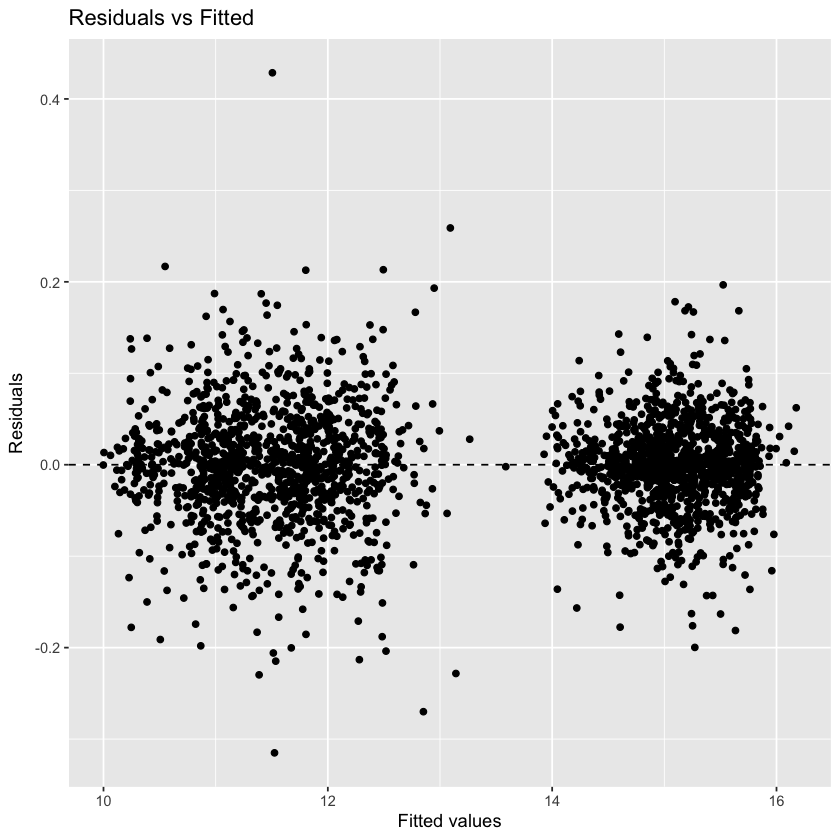

In [75]:
ggplot(full_model_w_int_log, aes(.fitted, .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(x = "Fitted values", y = "Residuals") +
  ggtitle("Residuals vs Fitted")

Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_qq()`)."
Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_qq_line()`)."


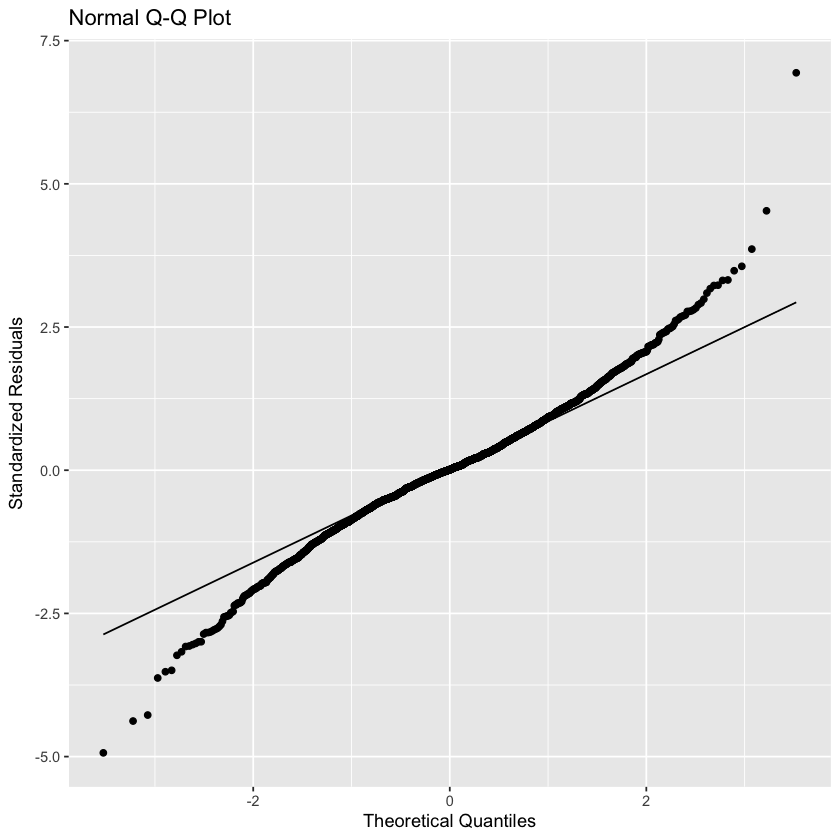

In [76]:
ggplot(full_model_w_int_log, aes(sample = .stdresid)) +
  stat_qq() +
  stat_qq_line() +
  labs(x = "Theoretical Quantiles", y = "Standardized Residuals") +
  ggtitle("Normal Q-Q Plot")

This looks much more promising. Though it still seems a bit heavy tailed, it is a huge improvement from the last qq plot.

But would it be necessary to have all of these interactions? In this next section we try a backward selection strategy, and fit five models each with one of the feature left out of the interaction. We then compare them based on AIC score and Mallow's Cp metric.

In [77]:
partial_model_w_int_log1 <- lm(log(Total.Volume) ~ type + AveragePrice * region * year * Month, data = df_filtered)
partial_model_w_int_log2 <- lm(log(Total.Volume) ~ AveragePrice + type * region * year * Month, data = df_filtered)
partial_model_w_int_log3 <- lm(log(Total.Volume) ~ region + type * AveragePrice * year * Month, data = df_filtered)
partial_model_w_int_log4 <- lm(log(Total.Volume) ~ year + type * AveragePrice * region * Month, data = df_filtered)
partial_model_w_int_log5 <- lm(log(Total.Volume) ~ Month + type * AveragePrice * region * year, data = df_filtered)

In [78]:
AIC(partial_model_w_int_log1)
AIC(partial_model_w_int_log2)
AIC(partial_model_w_int_log3)
AIC(partial_model_w_int_log4)
AIC(partial_model_w_int_log5)
AIC(full_model_w_int_log)

[1] -2467.607

[1] -3710.834

[1] -517.3629

[1] -1050.002

[1] -2867.676

[1] -4630.334